In [1]:
import pandas as pd
import numpy as np
import os
import sys
import time
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Load the data
data = pd.read_csv("../data/UK_resources/NHS_England_Regions_July_2022_EN_BFC_2022_8847953782386516656.csv")

# Load the shapefile
gdf = gpd.read_file('../data/UK_resources/NHS_England_Regions_July_2022_EN_BFC_2022_-5487250391308697487/NHSER_JUL_2022_EN_BFC.shp')


In [3]:
data.head()

,OBJECTID,NHSER22CD,NHSER22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,Shape__Area,Shape__Length
0,1,E40000003,London,517515,178392,-0.308660,51.49227,0ed9266f-d879-4018-b6f4-93e9141d17c5,1.573423e+09,4.324026e+05
1,2,E40000005,South East,471724,171073,-0.969570,51.43412,e65f164c-d972-4631-88ac-c4502d165b8f,1.868876e+10,2.741766e+06
2,3,E40000006,South West,285015,102567,-3.633430,50.81119,4c391736-de3a-4949-bfa1-28796fab96d4,2.387926e+10,3.588545e+06
3,4,E40000007,East of England,565970,255923,0.425889,52.17661,6b5f57d5-9882-48ca-bfe0-50bb8e40266c,1.949970e+10,3.977127e+06
4,5,E40000010,North West,356889,444857,-2.657550,53.89809,06dbe856-2d3b-478c-aaa5-205ab8e6ba43,9.260648e+09,1.925621e+06


In [4]:
gdf

,NHSER22CD,NHSER22NM,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E40000003,London,517515,178392,-0.308660,51.4923,0ed9266f-d879-4018-b6f4-93e9141d17c5,"MULTIPOLYGON (((516122.679 172421.288, 516112...."
1,E40000005,South East,471724,171073,-0.969570,51.4341,e65f164c-d972-4631-88ac-c4502d165b8f,"MULTIPOLYGON (((429043.995 84840.073, 429056.1..."
2,E40000006,South West,285015,102567,-3.633430,50.8112,4c391736-de3a-4949-bfa1-28796fab96d4,"MULTIPOLYGON (((83962.840 5401.150, 83970.680 ..."
3,E40000007,East of England,565970,255923,0.425889,52.1766,6b5f57d5-9882-48ca-bfe0-50bb8e40266c,"MULTIPOLYGON (((570605.060 181382.250, 570608...."
4,E40000010,North West,356889,444857,-2.657550,53.8981,06dbe856-2d3b-478c-aaa5-205ab8e6ba43,"MULTIPOLYGON (((327869.488 373719.637, 327869...."
5,E40000011,Midlands,436686,314502,-1.458210,52.7269,e98a319f-b86d-4974-b23f-ad197e10d667,"MULTIPOLYGON (((552751.427 326659.292, 552759...."
6,E40000012,North East and Yorkshire,388426,515856,-2.180390,54.5378,9e9b0244-95b4-4f72-b99f-8aab2cc57915,"MULTIPOLYGON (((495603.099 422511.497, 495629...."


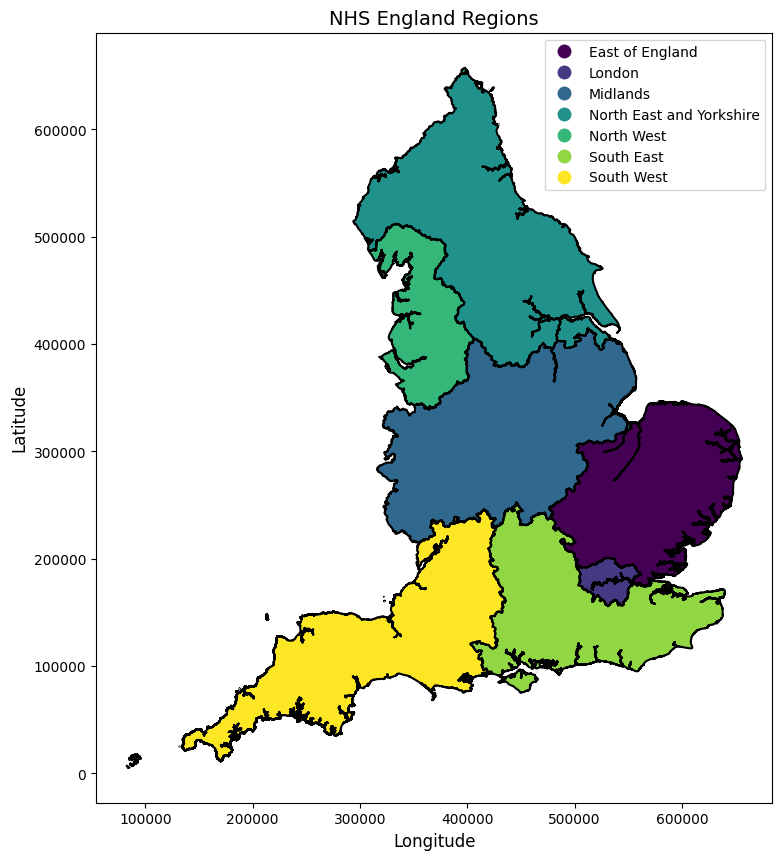

In [5]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the UK
gdf.boundary.plot(ax=ax, color='black')

# Plot the regions with different colors
gdf.plot(ax=ax, column='NHSER22NM', legend=True, cmap='viridis')

# Add labels
gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]
# for idx, row in gdf.iterrows():
#     plt.annotate(text=row['NHSER22NM'], xy=row['coords'], horizontalalignment='center')

# Set labels and title
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_title('NHS England Regions', fontsize=14)

plt.show()

In [113]:
total_df = pd.read_csv("../data/UK_resources/total_bed_occupancy_covid.csv", header=0, index_col=0)
mv_df = pd.read_csv("../data/MVB_covid19.csv", header=0, index_col=0)

In [114]:
mv_df.head()

,01/08/2020,02/08/2020,03/08/2020,04/08/2020,05/08/2020,06/08/2020,07/08/2020,08/08/2020,09/08/2020,10/08/2020,...,22/03/2022,23/03/2022,24/03/2022,25/03/2022,26/03/2022,27/03/2022,28/03/2022,29/03/2022,30/03/2022,31/03/2022
Name,,,,,,,,,,,,,,,,,,,,,
ENGLAND,74,72,67,65,63,61,57,55,56,60,...,269,260,286,290,304,303,319,325,318,311
East of England,9,9,8,8,8,9,9,11,9,8,...,36,29,29,38,46,41,41,37,36,39
London,16,15,17,15,13,11,10,10,12,12,...,99,98,109,107,105,98,103,109,104,100
Midlands,13,10,10,13,13,14,10,5,6,9,...,30,30,30,28,32,35,45,41,40,34
North East and Yorkshire,9,8,7,7,7,6,7,8,7,5,...,31,32,41,39,40,36,37,42,43,47


In [120]:
# Display the shape of the dataframe
print('Dataframe Shape:', mv_df.shape)

Dataframe Shape: (8, 608)


In [121]:
# Display the data types of each column
print(mv_df.dtypes)

01/08/2020    int64
02/08/2020    int64
03/08/2020    int64
04/08/2020    int64
05/08/2020    int64
              ...  
27/03/2022    int64
28/03/2022    int64
29/03/2022    int64
30/03/2022    int64
31/03/2022    int64
Length: 608, dtype: object


In [123]:
# Transpose the dataframe
mv_df = mv_df.transpose()

In [124]:
mv_df.head()

Name,ENGLAND,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
01/08/2020,74,9,16,13,9,15,12,0
02/08/2020,72,9,15,10,8,15,15,0
03/08/2020,67,8,17,10,7,13,12,0
04/08/2020,65,8,15,13,7,13,9,0
05/08/2020,63,8,13,13,7,13,9,0


In [125]:
mv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 01/08/2020 to 31/03/2022
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   ENGLAND                   608 non-null    int64
 1   East of England           608 non-null    int64
 2   London                    608 non-null    int64
 3   Midlands                  608 non-null    int64
 4   North East and Yorkshire  608 non-null    int64
 5   North West                608 non-null    int64
 6   South East                608 non-null    int64
 7   South West                608 non-null    int64
dtypes: int64(8)
memory usage: 58.9+ KB


In [110]:
total_df.index = pd.to_datetime(total_df.index, format='%d-%b-%y')

In [111]:
total_df.head()

Name,ENGLAND,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
2020-08-01,879,85,126,216,117,191,123,21
2020-08-02,847,80,120,194,120,188,122,23
2020-08-03,842,73,122,206,115,181,122,23
2020-08-04,807,69,118,182,123,181,111,23
2020-08-05,805,70,111,181,128,183,106,26


In [112]:
for column in mv_df.columns:
    mv_df[column] = mv_df[column].str.replace(',', '').astype(int)

ValueError: cannot convert float NaN to integer

In [126]:
mv_df

Name,ENGLAND,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
01/08/2020,74,9,16,13,9,15,12,0
02/08/2020,72,9,15,10,8,15,15,0
03/08/2020,67,8,17,10,7,13,12,0
04/08/2020,65,8,15,13,7,13,9,0
05/08/2020,63,8,13,13,7,13,9,0
...,...,...,...,...,...,...,...,...
27/03/2022,303,41,98,35,36,36,31,26
28/03/2022,319,41,103,45,37,33,32,28
29/03/2022,325,37,109,41,42,34,30,32
30/03/2022,318,36,104,40,43,33,32,30


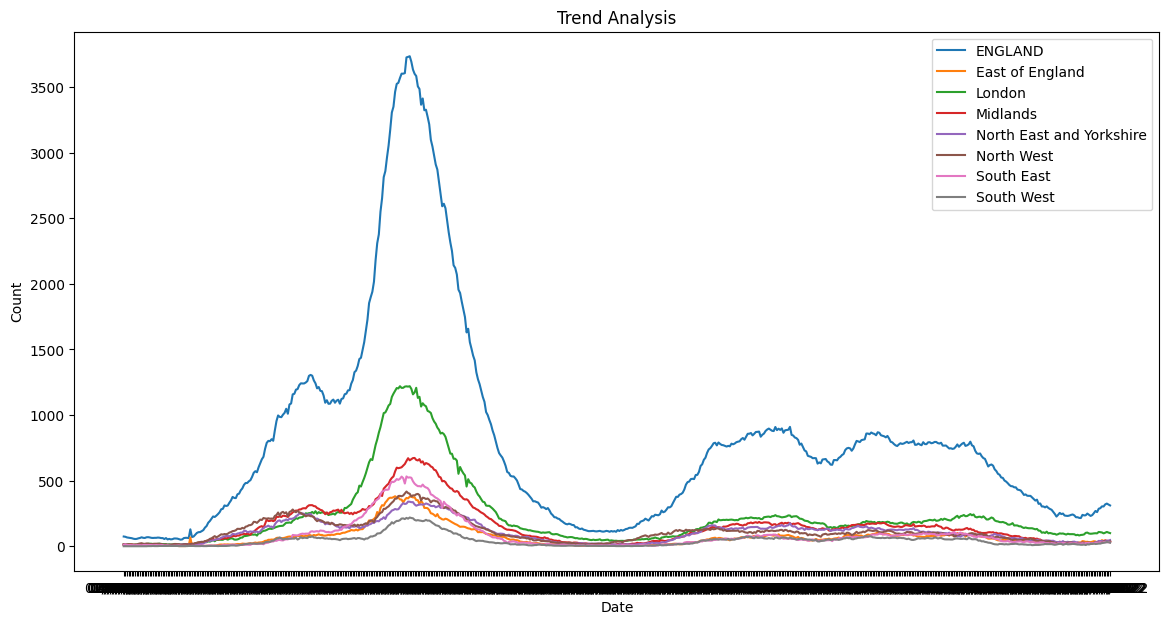

In [127]:
plt.figure(figsize=(14,7))
for column in mv_df.columns:
    plt.plot(mv_df.index, mv_df[column], label=column)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trend Analysis')
plt.show()

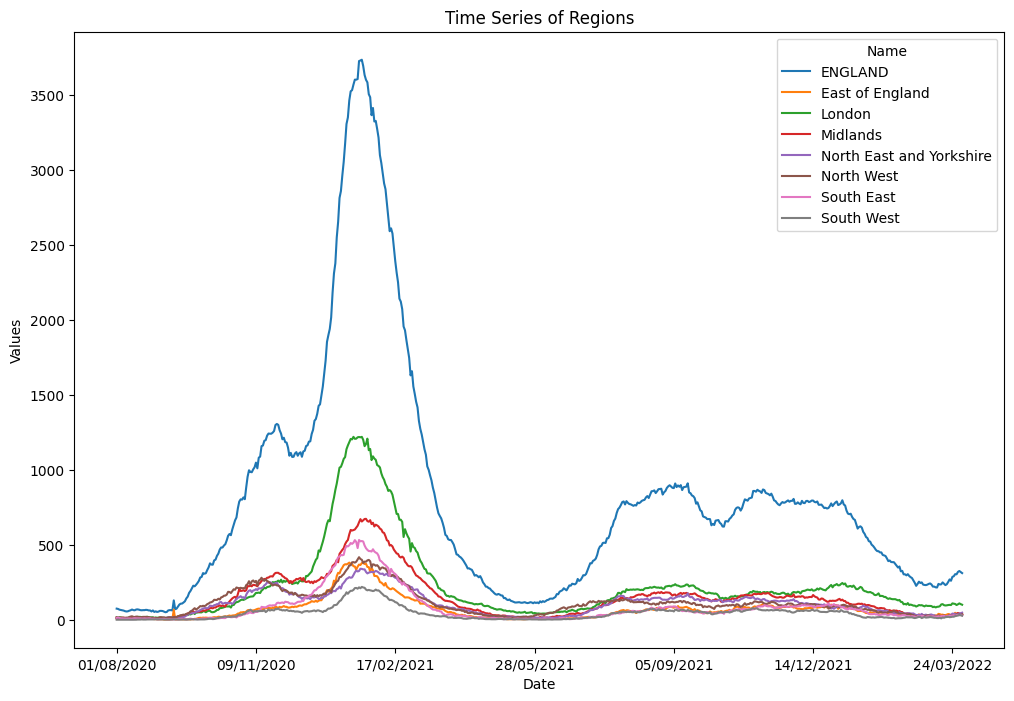

In [128]:
# Plot the data
mv_df.plot(figsize=(12, 8))

# Set the title and labels
plt.title('Time Series of Regions')
plt.xlabel('Date')
plt.ylabel('Values')

# Show the plot
plt.show()

In [135]:
mv_df = mv_df.rename(columns={'Name': 'Date'})
print(mv_df.columns)

Index(['ENGLAND', 'East of England', 'London', 'Midlands',
       'North East and Yorkshire', 'North West', 'South East', 'South West'],
      dtype='object', name='Name')


In [133]:
mv_df.head()

Name,ENGLAND,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
01/08/2020,74,9,16,13,9,15,12,0
02/08/2020,72,9,15,10,8,15,15,0
03/08/2020,67,8,17,10,7,13,12,0
04/08/2020,65,8,15,13,7,13,9,0
05/08/2020,63,8,13,13,7,13,9,0


In [131]:
# Check for missing values
print(mv_df.isnull().sum())


Name
ENGLAND                     0
East of England             0
London                      0
Midlands                    0
North East and Yorkshire    0
North West                  0
South East                  0
South West                  0
dtype: int64


In [31]:
# Check for duplicate rows
print(total_df.duplicated().sum())

0


In [32]:
# Display descriptive statistics
print(mv_df.describe())


       01-Aug-20  02-Aug-20  03-Aug-20  04-Aug-20  05-Aug-20  06-Aug-20   
count   8.000000    8.00000   8.000000   8.000000   8.000000    8.00000  \
mean   18.500000   18.00000  16.750000  16.250000  15.750000   15.25000   
std    22.972033   22.39898  20.906253  20.246693  19.586803   19.00188   
min     0.000000    0.00000   0.000000   0.000000   0.000000    0.00000   
25%     9.000000    8.75000   7.750000   7.750000   7.750000    7.50000   
50%    12.500000   12.50000  11.000000  11.000000  11.000000   10.00000   
75%    15.250000   15.00000  14.000000  13.500000  13.000000   13.25000   
max    74.000000   72.00000  67.000000  65.000000  63.000000   61.00000   

       07-Aug-20  08-Aug-20  09-Aug-20  10-Aug-20  ...   28-Mar-21   
count    8.00000   8.000000   8.000000   8.000000  ...    8.000000  \
mean    14.25000  13.750000  14.000000  15.000000  ...  133.000000   
std     17.67767  17.185958  17.476515  18.905781  ...  167.358469   
min      0.00000   0.000000   0.000000   0.0

In [33]:
mv_df

,Name,01-Aug-20,02-Aug-20,03-Aug-20,04-Aug-20,05-Aug-20,06-Aug-20,07-Aug-20,08-Aug-20,09-Aug-20,...,28-Mar-21,29-Mar-21,30-Mar-21,31-Mar-21,01-Apr-21,02-Apr-21,03-Apr-21,04-Apr-21,05-Apr-21,06-Apr-21
0,ENGLAND,74,72,67,65,63,61,57,55,56,...,532,532,518,501,470,436,433,422,416,406
1,East of England,9,9,8,8,8,9,9,11,9,...,51,51,46,46,42,35,34,31,32,33
2,London,16,15,17,15,13,11,10,10,12,...,153,158,154,153,147,137,134,130,129,126
3,Midlands,13,10,10,13,13,14,10,5,6,...,123,120,117,111,104,96,88,85,82,81
4,North East and Yorkshire,9,8,7,7,7,6,7,8,7,...,81,77,80,79,75,65,69,70,69,72
5,North West,15,15,13,13,13,13,13,14,14,...,73,74,71,69,68,64,67,65,64,59
6,South East,12,15,12,9,9,8,8,7,8,...,36,37,34,31,22,27,28,28,28,25
7,South West,0,0,0,0,0,0,0,0,0,...,15,15,16,12,12,12,13,13,12,10


In [34]:
# Melt the dataframe to a long format
df_long = total_df.melt(id_vars='Name', var_name='Date', value_name='Value')
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%d-%b-%y')
df_long['Value'] = df_long['Value'].str.replace(',', '').astype(int)
print(df_long.head())


KeyError: 'Name'

In [22]:
# Transpose the dataframe to make dates as rows and regions as columns, skip the first row (Name of the region)
df_T = mv_df.transpose().iloc[1:]


In [23]:
df_T.head()

,Name,01-Aug-20,02-Aug-20,03-Aug-20,04-Aug-20,05-Aug-20,06-Aug-20,07-Aug-20,08-Aug-20,09-Aug-20,...,28-Mar-21,29-Mar-21,30-Mar-21,31-Mar-21,01-Apr-21,02-Apr-21,03-Apr-21,04-Apr-21,05-Apr-21,06-Apr-21
1,East of England,9,9,8,8,8,9,9,11,9,...,51,51,46,46,42,35,34,31,32,33
2,London,16,15,17,15,13,11,10,10,12,...,153,158,154,153,147,137,134,130,129,126
3,Midlands,13,10,10,13,13,14,10,5,6,...,123,120,117,111,104,96,88,85,82,81
4,North East and Yorkshire,9,8,7,7,7,6,7,8,7,...,81,77,80,79,75,65,69,70,69,72
5,North West,15,15,13,13,13,13,13,14,14,...,73,74,71,69,68,64,67,65,64,59


In [ ]:
# Convert index to datetime
df_T.index = pd.to_datetime(df_T.index)

# Plot line plot for each region
plt.figure(figsize=(15,8))
for column in df_T.columns:
    plt.plot(df_T[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trends Over Time')
plt.legend()
plt.show()

In [32]:
# Check for missing values using isnull()
missing_values = total_df.isnull()

# Count the number of missing values per column using sum()
missing_values_count = missing_values.sum()

# Display the count of missing values per column
print(missing_values_count)

Name
ENGLAND                     0
East of England             0
London                      0
Midlands                    0
North East and Yorkshire    0
North West                  0
South East                  0
South West                  0
dtype: int64


In [19]:
# Transpose the DataFrame
mv_df = mv_df.T
mv_df.head()

,0,1,2,3,4,5,6,7
Name,ENGLAND,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
01-Aug-20,74,9,16,13,9,15,12,0
02-Aug-20,72,9,15,10,8,15,15,0
03-Aug-20,67,8,17,10,7,13,12,0
04-Aug-20,65,8,15,13,7,13,9,0


In [33]:
# Convert the index to datetime
mv_df.index = pd.to_datetime(mv_df.index, format='%d-%b-%y')
mv_df.head()

ValueError: time data "Name" doesn't match format "%d-%b-%y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [34]:
for column in mv_df.columns:
    mv_df[column] = mv_df[column].str.replace(',', '').astype(float)

ValueError: could not convert string to float: 'ENGLAND'

In [37]:
# Check for missing values using isnull()
missing_values = total_df.isnull()

# Count the number of missing values per column using sum()
missing_values_count = missing_values.sum()

# Display the count of missing values per column
print(missing_values_count)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64
